In [54]:
# Different Loss Functions and implementation

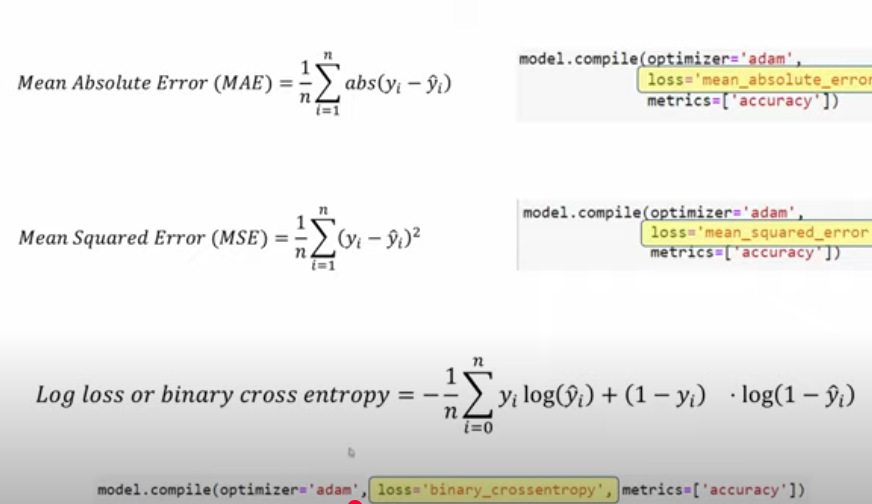

In [55]:
# Mean Absolute Error (MAE) is a loss function used primarily in regression problems.
# It calculates the average of the absolute differences between the actual and predicted values:

#Treats all errors equally (even outliers)
# Commonly used in: Regression models where interpretability matters (e.g., in business forecasting).

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Sample labels truth  and predictions
y_true = np.array([3, 5, 2, 7])
y_pred = np.array([2.5, 5.3, 1.8, 6.2])


In [57]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mae_value = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae_value:.4f}")


Mean Absolute Error (MAE): 0.4500


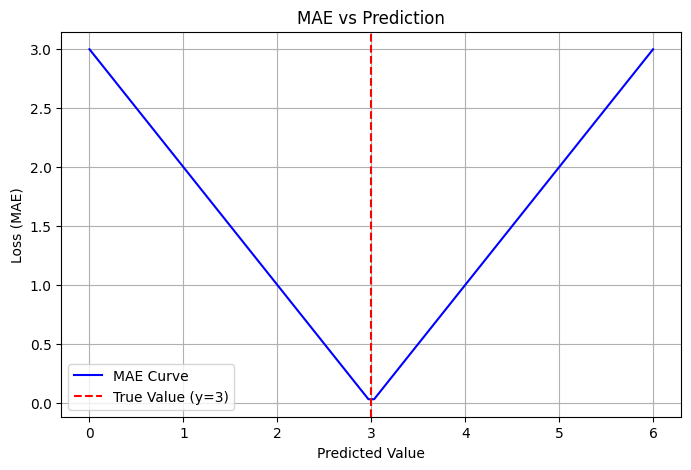

In [58]:
# True label
y_fixed = 3

# Predicted values to test
y_preds = np.linspace(0, 6, 100)   #Generates 100 predicted values ranging from 0 to 6.
mae_vals = np.abs(y_preds - y_fixed)   #Calculates the Mean Absolute Error for each

# Plot
plt.figure(figsize=(8,5))
plt.plot(y_preds, mae_vals, label="MAE Curve", color="blue")
plt.axvline(x=y_fixed, color='red', linestyle='--', label="True Value (y=3)")
plt.xlabel("Predicted Value")
plt.ylabel("Loss (MAE)")
plt.title("MAE vs Prediction")
plt.legend()
plt.grid(True)
plt.show()

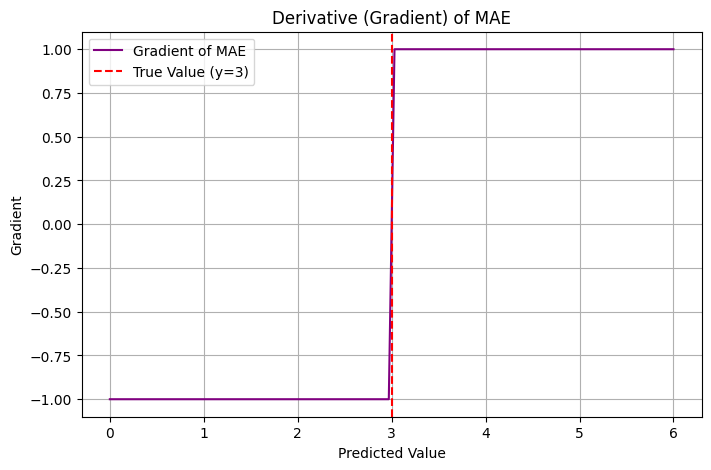

In [59]:
# Derivative of MAE is either -1, 0, or 1
def mae_derivative(y_true, y_pred):
    diff = y_pred - y_true
    grad = np.where(diff < 0, -1, np.where(diff > 0, 1, 0))
    return grad

# Plot gradient
grad_vals = mae_derivative(y_fixed, y_preds)

plt.figure(figsize=(8,5))
plt.plot(y_preds, grad_vals, label="Gradient of MAE", color="purple")
plt.axvline(x=y_fixed, color='red', linestyle='--', label="True Value (y=3)")
plt.xlabel("Predicted Value")
plt.ylabel("Gradient")
plt.title("Derivative (Gradient) of MAE")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# The derivative of MAE is -1, 0, or +1 depending on whether the prediction is below, equal to, or above the actual value.
#  This results in constant gradients that can make optimization less stable or slower compared to MSE, which has smooth and proportional gradients.

#  Mean Absolute Error (MAE) Summary

#  Formula:  
   MAE = (1/n) * Σ|y - ŷ|

#  Use-Case:  
  Used when we want a simple average of errors. Less sensitive to outliers.

#  Graph Shape:  
  V-shaped (linear on both sides)

#  Derivative:  
   Not differentiable at 0  
   Derivative = -1 when ŷ < y,  
                +1 when ŷ > y,  
                0 when ŷ = y

  Pro: Robust to outliers  
  Cons: Not smooth; gradients jump

In [60]:
# Mean Squared Error (MSE) measures the average of the squares of the errors between actual and predicted values.
# Commonly used in: Linear regression

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Sample ground truth and predictions
y_true = np.array([3, 5, 2, 7])
y_pred = np.array([2.5, 5.3, 1.8, 6.2])


In [62]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse_value = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse_value:.4f}")

Mean Squared Error (MSE): 0.2550


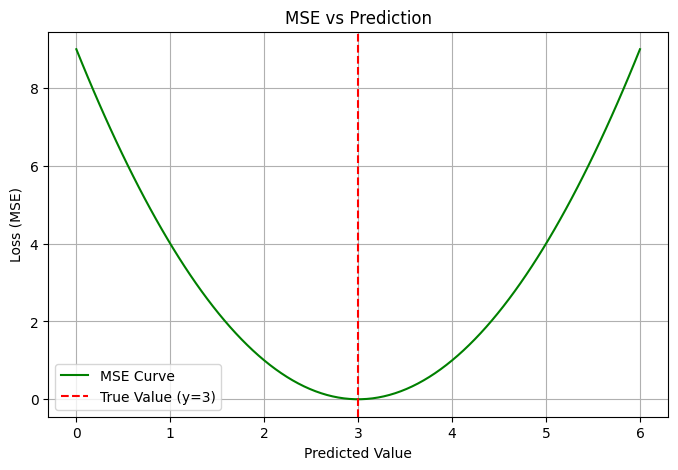

In [63]:
# Fixed actual value
y_fixed = 3

# Range of predicted values
y_preds = np.linspace(0, 6, 100)
mse_vals = (y_preds - y_fixed) ** 2

# Plot MSE curve
plt.figure(figsize=(8,5))
plt.plot(y_preds, mse_vals, label="MSE Curve", color="green")
plt.axvline(x=y_fixed, color='red', linestyle='--', label="True Value (y=3)")
plt.xlabel("Predicted Value")
plt.ylabel("Loss (MSE)")
plt.title("MSE vs Prediction")
plt.legend()
plt.grid(True)
plt.show()


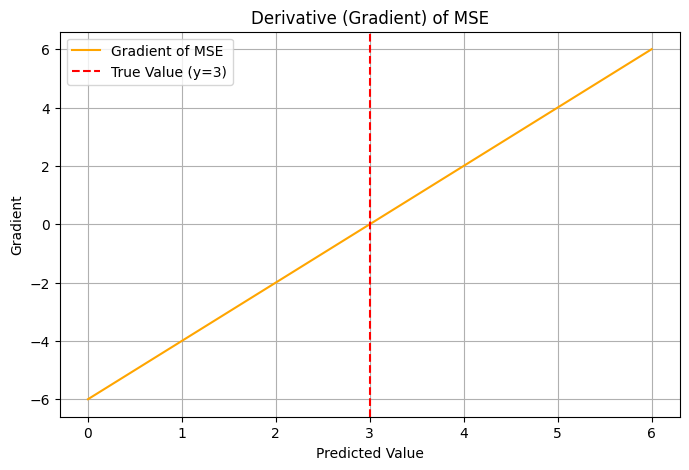

In [64]:
# Derivative of MSE: dL/dŷ = 2(ŷ - y)
def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

grad_vals = mse_derivative(y_fixed, y_preds)

# Plot the derivative
plt.figure(figsize=(8,5))
plt.plot(y_preds, grad_vals, label="Gradient of MSE", color="orange")
plt.axvline(x=y_fixed, color='red', linestyle='--', label="True Value (y=3)")
plt.xlabel("Predicted Value")
plt.ylabel("Gradient")
plt.title("Derivative (Gradient) of MSE")
plt.legend()
plt.grid(True)
plt.show()


#  Mean Squared Error (MSE) Summary

 **Formula:**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


  Use-Case:  
   Use when large errors need to be penalized more. Not robust to outliers.

#  Graph Shape:  
   U-shaped (quadratic curve)

 **Derivative:**

$$
\frac{d}{d\hat{y}_i} = 2(\hat{y}_i - y_i)
$$


  Pro: Smooth and differentiable everywhere  
  Con: Sensitive to outliers (big errors dominate)



In [65]:
# Binary Cross Entropy measures the difference between two probability distributions
# — the predicted probability and the actual label (which is either 0 or 1).

# This loss function punishes confident wrong predictions heavily.
# If the true label is 1, and you predict 0.01, the loss becomes very large.

# y∈{0,1} = the true label
# y^∈(0,1) = the predicted probability

In [ ]:
# #Maths :
# First term:
# 𝑦⋅log⁡(𝑦^)
# This part is active only when the true label is 1 It means:
# "If the real answer is 1, the model should confidently predict a high probability for 1"
# So if:
# y=1 and 𝑦^=0.99 → low loss (good)
# y=1 and 𝑦^=0.01 → high loss (bad)

# 2. Second term:
# (1−𝑦)⋅log⁡(1−𝑦^)
# This part is active only when the true label is 0. It means:
# "If the real answer is 0, the model should confidently predict a low probability for 1 (i.e., high for 0)"
# So if:
# y=0 and 𝑦^=0.01 → low loss (good)
# y=0 and 𝑦^=0.99 → high loss (bad)

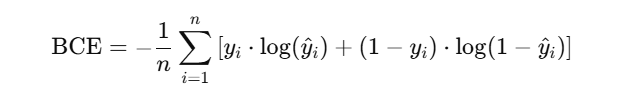

###  Binary Cross Entropy (BCE)


- **Use-Case:**  
  Used for binary classification problems (labels are 0 or 1)

- **Prediction Range:**  
  Predictions should be probabilities in the range (0, 1)

- **Punishment:**  
  Confident wrong predictions are punished heavily

- **Graph Shape:**  
  Sharp curve as predictions get close to 0 or 1

- **Derivative:**

$$
\frac{dL}{d\hat{y}} = \frac{\hat{y} - y}{\hat{y}(1 - \hat{y})}
$$

- **Pros:**  
  Good for probability-based classifiers, smooth, works well with sigmoid

- **Cons:**  
  Sensitive to overconfident wrong predictions


In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Sample true binary labels and predicted probabilities
y_true = np.array([1, 0, 1, 0])
y_pred = np.array([0.9, 0.1, 0.8, 0.4])  # predicted probabilities


In [67]:
def binary_cross_entropy(y_true, y_pred, eps=1e-15): # this value is very close to 1
    y_pred = np.clip(y_pred, eps, 1 - eps)  # avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

bce_value = binary_cross_entropy(y_true, y_pred)
print(f"Binary Cross Entropy (BCE): {bce_value:.4f}")


Binary Cross Entropy (BCE): 0.2362


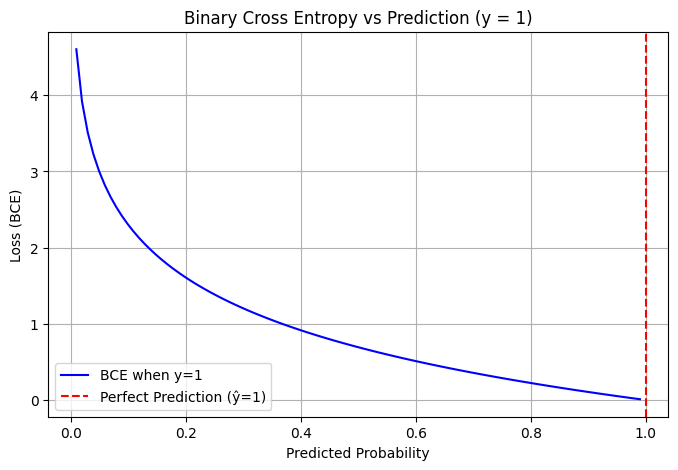

In [68]:
# True label is 1
y_fixed = 1
y_preds = np.linspace(0.01, 0.99, 100)
bce_vals = - (y_fixed * np.log(y_preds) + (1 - y_fixed) * np.log(1 - y_preds))

plt.figure(figsize=(8,5))
plt.plot(y_preds, bce_vals, label="BCE when y=1", color="blue")
plt.axvline(x=1, color='red', linestyle='--', label="Perfect Prediction (ŷ=1)")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss (BCE)")
plt.title("Binary Cross Entropy vs Prediction (y = 1)")
plt.legend()
plt.grid(True)
plt.show()


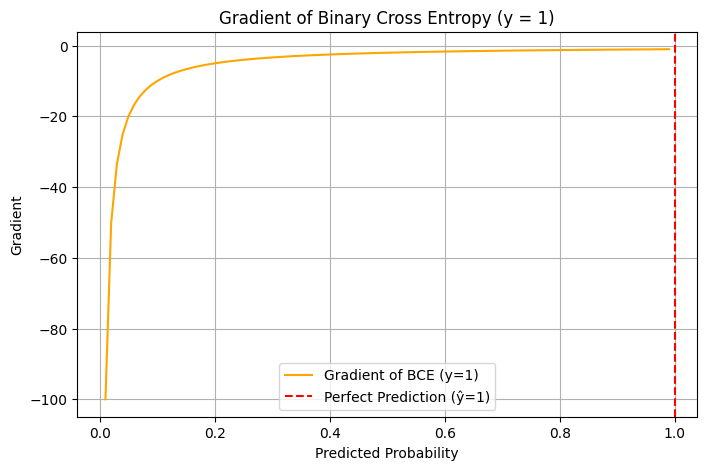

In [69]:
def bce_derivative(y, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return (y_pred - y) / (y_pred * (1 - y_pred))

grads = bce_derivative(y_fixed, y_preds)

plt.figure(figsize=(8,5))
plt.plot(y_preds, grads, label="Gradient of BCE (y=1)", color="orange")
plt.axvline(x=1, color='red', linestyle='--', label="Perfect Prediction (ŷ=1)")
plt.xlabel("Predicted Probability")
plt.ylabel("Gradient")
plt.title("Gradient of Binary Cross Entropy (y = 1)")
plt.legend()
plt.grid(True)
plt.show()


In [70]:
# #Why Use Log Loss (BCE) Instead of MSE for Logistic Regression?

# The likelihood function of logistic regression naturally leads to BCE.
# BCE provides better gradients for training probabilities (outputs between 0 and 1).
# MSE is not convex when used with a sigmoid, which makes optimization harder.
# BCE penalizes confident wrong predictions more heavily, which is desired in classification.

In [71]:
# n logistic regression, the output is a probability between 0 and 1.
# If we use MSE, we’re saying “let’s penalize how far this is from 0 or 1” — but that doesn’t capture confidence well.
# BCE (log loss) says:
# “If you predicted 0.99 and the true label was 0 — you deserve to be punished badly.”
# Mathematically, log loss = negative log likelihood, and MLE (maximum likelihood estimation) is the correct statistical framework for classification — which leads to BCE.

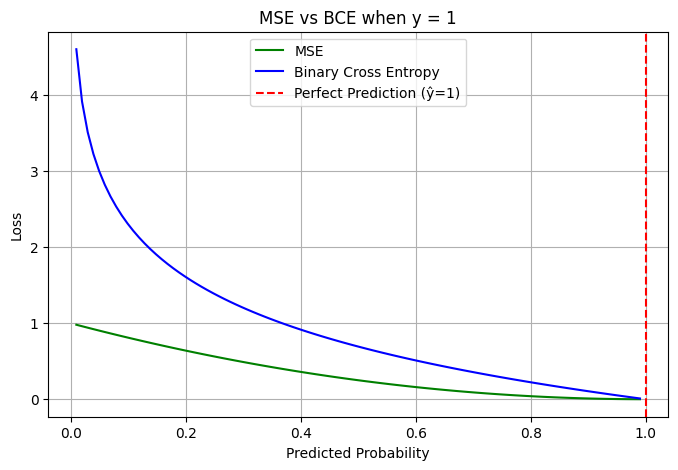

In [72]:
#Visualisation for above stated
y_true = 1
y_preds = np.linspace(0.01, 0.99, 100)

mse_vals = (y_preds - y_true)**2
bce_vals = - (y_true * np.log(y_preds) + (1 - y_true) * np.log(1 - y_preds))

plt.figure(figsize=(8,5))
plt.plot(y_preds, mse_vals, label="MSE", color="green")
plt.plot(y_preds, bce_vals, label="Binary Cross Entropy", color="blue")
plt.axvline(x=1, color='red', linestyle='--', label="Perfect Prediction (ŷ=1)")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.title("MSE vs BCE when y = 1")
plt.legend()
plt.grid(True)
plt.show()
#This shows how BCE punishes low probabilities more steeply than MSE.

In [73]:
# LOSS FUNCTION 4: Categorical Cross Entropy (CCE) :
# Categorical Cross Entropy measures the distance between the true class
# (as a one-hot encoded vector) and the predicted probability distribution over all classes.

#one hot encoding: for suppose 4 classes 1,2,3,4 : [0,0,1,0] i.e Only the correct class index (2) is set to 1
# It compares the true class (one-hot) with the predicted probability distribution.
# It rewards high probability for the correct class and punishes high probability for wrong classes.
# Only the log probability of the correct class matters (since the one-hot vector zeros out all others).

# used in multi-class classification, where the true label is one-hot encoded,
# and the model outputs a probability distribution (via Softmax).

# Softmax is a function that converts raw scores (logits) from a neural network into probabilities that sum to 1.
# It tells us:How confident is the model that the input belongs to each class?

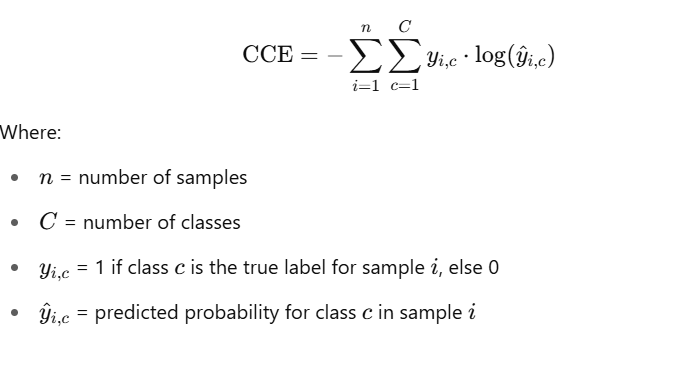

###  Categorical Cross Entropy (CCE)

- **Use-Case:**  
  Multi-class classification (softmax output, one-hot labels)

- **Prediction Format:**  
  Probability vector (e.g., [0.2, 0.7, 0.1])

- **Label Format:**  
  One-hot (e.g., [0, 1, 0])

- **Derivative:**

$$
\frac{\partial L}{\partial \hat{y}_c} = -\frac{y_c}{\hat{y}_c}
$$

If softmax is applied before loss:

$$
\frac{\partial L}{\partial z_c} = \hat{y}_c - y_c
$$

- **Behavior:**  
  Rewards high confidence on correct class  
  Penalizes wrong confidence heavily


In [74]:
import numpy as np

# One-hot encoded true labels (3 samples, 4 classes)
y_true = np.array([
    [0, 1, 0, 0],  # class 1
    [0, 0, 1, 0],  # class 2
    [1, 0, 0, 0]   # class 0
])

# Predicted probabilities (softmax output)
y_pred = np.array([
    [0.1, 0.6, 0.2, 0.1],
    [0.05, 0.1, 0.8, 0.05],
    [0.7, 0.1, 0.1, 0.1]
])


In [75]:
def categorical_cross_entropy(y_true, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

cce_value = categorical_cross_entropy(y_true, y_pred)
print(f"Categorical Cross Entropy (CCE): {cce_value:.4f}")


Categorical Cross Entropy (CCE): 0.3635


In [76]:
# Incorrect predictions (low prob for true class)
bad_pred = np.array([
    [0.25, 0.25, 0.25, 0.25],
    [0.4, 0.3, 0.2, 0.1],
    [0.1, 0.1, 0.7, 0.1]
])

print("Good Prediction Loss:", categorical_cross_entropy(y_true, y_pred))
print("Bad Prediction Loss:", categorical_cross_entropy(y_true, bad_pred))


Good Prediction Loss: 0.3635480396729776
Bad Prediction Loss: 1.7661057888493454


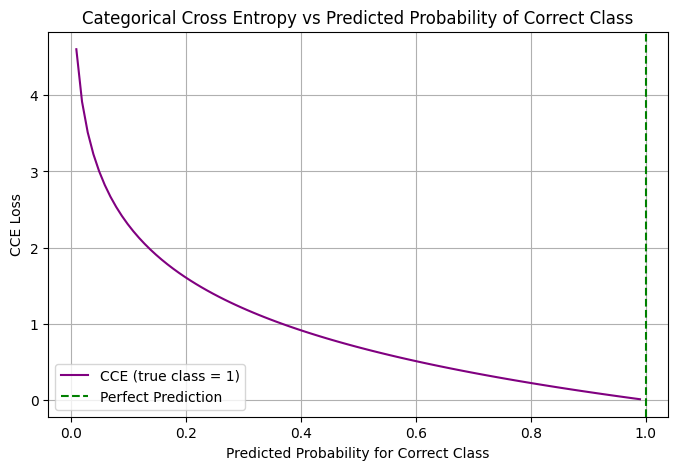

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed true label: class 1 → one-hot encoded
y_true = np.array([0, 1, 0])

# Vary predicted probability for correct class (class 1)
correct_class_probs = np.linspace(0.01, 0.99, 100)

# Assume other probabilities share the remaining equally
cce_losses = []

for p in correct_class_probs:
    # Distribute remaining probability among other classes
    rest = (1 - p) / 2
    y_pred = np.array([rest, p, rest])
    loss = -np.sum(y_true * np.log(y_pred))
    cce_losses.append(loss)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(correct_class_probs, cce_losses, color="purple", label="CCE (true class = 1)")
plt.axvline(x=1.0, color='green', linestyle='--', label="Perfect Prediction")
plt.xlabel("Predicted Probability for Correct Class")
plt.ylabel("CCE Loss")
plt.title("Categorical Cross Entropy vs Predicted Probability of Correct Class")
plt.grid(True)
plt.legend()
plt.show()


In [77]:
#  LOSS FUNCTION 5: Sparse Categorical Cross Entropy (Sparse CCE)
# Sparse Categorical Cross Entropy is the same as categorical cross entropy,
# but it expects the labels as integers (e.g., 2 for class 2), not one-hot encoded vectors.

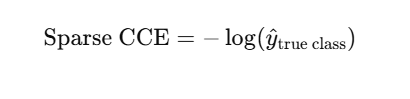

###  Sparse Categorical Cross Entropy (Sparse CCE)

- **Use-Case:**  
  Multi-class classification (with softmax outputs)

- **Label Format:**  
  Class index (e.g., 2 instead of [0, 0, 1])

- **Prediction Format:**  
  Probability vector (e.g., [0.2, 0.7, 0.1])

- **Same as CCE?**  
   Yes — only input format is different

- **Why use it?**  
  Memory-efficient and simpler when labels are class IDs


In [78]:
import numpy as np

# Sparse class labels (not one-hot)
y_true_sparse = np.array([1, 2, 0])  # 3 samples

# Predicted probabilities (softmax output)
y_pred = np.array([
    [0.1, 0.6, 0.2, 0.1],
    [0.05, 0.1, 0.8, 0.05],
    [0.7, 0.1, 0.1, 0.1]
])


In [79]:
def sparse_categorical_cross_entropy(y_true_sparse, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    correct_probs = y_pred[np.arange(len(y_true_sparse)), y_true_sparse]
    return -np.mean(np.log(correct_probs))

sparse_cce_value = sparse_categorical_cross_entropy(y_true_sparse, y_pred)
print(f"Sparse Categorical Cross Entropy: {sparse_cce_value:.4f}")


Sparse Categorical Cross Entropy: 0.3635


In [80]:
# One-hot version for comparison
y_true_one_hot = np.array([
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 0, 0, 0]
])

def categorical_cross_entropy(y_true, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

print("CCE (one-hot):", categorical_cross_entropy(y_true_one_hot, y_pred))
print("Sparse CCE (indices):", sparse_categorical_cross_entropy(y_true_sparse, y_pred))


CCE (one-hot): 0.3635480396729776
Sparse CCE (indices): 0.3635480396729776


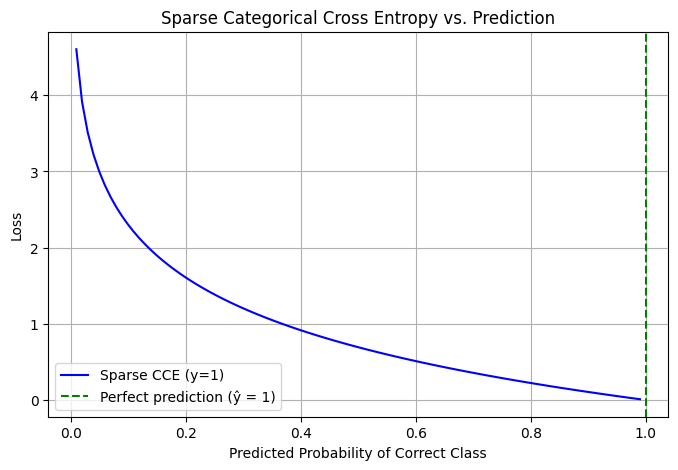

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# True class is class 1
y_true_class = 1

# Vary predicted probability for the correct class (from 0.01 to 0.99)
correct_class_probs = np.linspace(0.01, 0.99, 100)

# Calculate Sparse CCE = -log(predicted prob of correct class)
sparse_cce_vals = -np.log(correct_class_probs)

# Plot
plt.figure(figsize=(8,5))
plt.plot(correct_class_probs, sparse_cce_vals, label="Sparse CCE (y=1)", color="blue")
plt.axvline(x=1.0, color='green', linestyle='--', label="Perfect prediction (ŷ = 1)")
plt.xlabel("Predicted Probability of Correct Class")
plt.ylabel("Loss")
plt.title("Sparse Categorical Cross Entropy vs. Prediction")
plt.legend()
plt.grid(True)
plt.show()
